# Exploratory Data Analysis (EDA)

## Imports

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import string
import spacy
from wordcloud import WordCloud
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

## Load Datasets

In [3]:
scripts_df = pd.read_csv('Data/Processed/simpsons_cleaned_script_lines.csv')
episods_df = pd.read_csv('Data/Processed/simpsons_cleaned_episodes.csv')

scripts_df.head()

,episode_id,character,location,raw_text
0,32,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim..."
1,32,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?
2,32,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...
3,32,Lisa Simpson,Springfield Elementary School,That life is worth living.
4,32,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...


## Analysis

### Twenty Most Common Words

In [4]:
all_words = []

for i, raw_text in enumerate(scripts_df['raw_text']):
    
    # Convert to lowercase
    raw_text = raw_text.lower()
    
    # Lemmatize and remove stop words
    new_text = ' '.join([token.lemma_ for token in nlp(raw_text) if token.lemma_ not in nlp.Defaults.stop_words])
    
    # Remove punctuation
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    
    # Split and add to all_wrds list
    all_words += new_text.split()
    
    # Log
    if i % 1000 == 0:
        print(f'Processing {i} Script...')

Processing 0 Script...
Processing 1000 Script...
Processing 2000 Script...
Processing 3000 Script...
Processing 4000 Script...
Processing 5000 Script...
Processing 6000 Script...
Processing 7000 Script...
Processing 8000 Script...
Processing 9000 Script...
Processing 10000 Script...
Processing 11000 Script...
Processing 12000 Script...
Processing 13000 Script...
Processing 14000 Script...
Processing 15000 Script...
Processing 16000 Script...
Processing 17000 Script...
Processing 18000 Script...
Processing 19000 Script...
Processing 20000 Script...
Processing 21000 Script...
Processing 22000 Script...
Processing 23000 Script...
Processing 24000 Script...
Processing 25000 Script...
Processing 26000 Script...
Processing 27000 Script...
Processing 28000 Script...
Processing 29000 Script...
Processing 30000 Script...
Processing 31000 Script...
Processing 32000 Script...
Processing 33000 Script...
Processing 34000 Script...
Processing 35000 Script...
Processing 36000 Script...
Processing 370

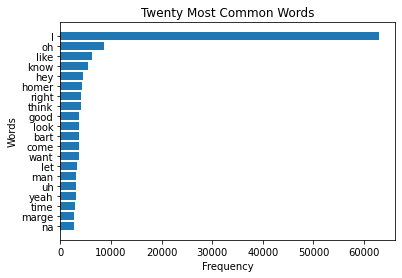

In [5]:
word_freq = pd.Series(all_words).value_counts().sort_values(ascending = False)

plt.barh(word_freq[:20].keys()[::-1], word_freq[:20].values[::-1])
plt.title('Twenty Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

### Ten Most Active Characters

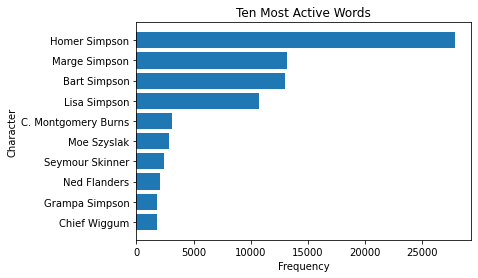

In [6]:
characters_freq = scripts_df['character'].value_counts().sort_values(ascending = False)

plt.barh(characters_freq[:10].keys()[::-1], characters_freq[:10].values[::-1])
plt.title('Ten Most Active Words')
plt.xlabel('Frequency')
plt.ylabel('Character')
plt.show()

### WordCloud of the Common Words

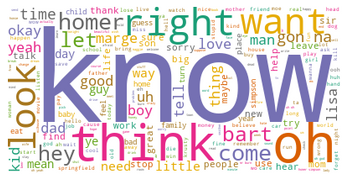

In [7]:
wc = WordCloud(
    background_color = "white",
    colormap = "Dark2",
    max_font_size = 150,
)

wc.generate(' '.join(all_words))

plt.imshow(wc, interpolation = 'spline36')
plt.axis("off")
plt.show()

### Sentiment Analysis

In [71]:
polarities = []
subjectivities = []

for i, raw_text in enumerate(scripts_df['raw_text']):
    
    doc = nlp(raw_text)
    polarities.append(doc._.polarity)
    subjectivities.append(doc._.subjectivity)
    
    if i % 1000 == 0:
        print(f'Processing {i} Script...')

Processing 0 Script...
Processing 1000 Script...
Processing 2000 Script...
Processing 3000 Script...
Processing 4000 Script...
Processing 5000 Script...
Processing 6000 Script...
Processing 7000 Script...
Processing 8000 Script...
Processing 9000 Script...
Processing 10000 Script...
Processing 11000 Script...
Processing 12000 Script...
Processing 13000 Script...
Processing 14000 Script...
Processing 15000 Script...
Processing 16000 Script...
Processing 17000 Script...
Processing 18000 Script...
Processing 19000 Script...
Processing 20000 Script...
Processing 21000 Script...
Processing 22000 Script...
Processing 23000 Script...
Processing 24000 Script...
Processing 25000 Script...
Processing 26000 Script...
Processing 27000 Script...
Processing 28000 Script...
Processing 29000 Script...
Processing 30000 Script...
Processing 31000 Script...
Processing 32000 Script...
Processing 33000 Script...
Processing 34000 Script...
Processing 35000 Script...
Processing 36000 Script...
Processing 370

In [74]:
scripts_df['polarity'] = polarities
scripts_df['subjectivity'] = subjectivities

# Save new DataFrame
scripts_df.to_csv('Data/Processed/sentimented_script_lines.csv', index = False)